In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd
from scipy.signal import resample

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='3'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
fs = 22050
# y_list = np.load('../y_list.npy')
s = np.linspace(0,10,fs*10)
y = np.sin(2*np.pi*250*s, dtype=np.float32) + np.sin(2*np.pi*280*s, dtype=np.float32) \
    + np.sin(2*np.pi*480*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32)  
y_torch = torch.tensor(y, dtype=torch.float)

n_bins=84

mel_layer = Spectrogram.CQT1992(sr=fs, n_bins=n_bins, bins_per_octave=12, fmin=50, center=True)
spec = mel_layer(y_torch)

mel_layer = Spectrogram.CQT2010(sr=fs, n_bins=n_bins, bins_per_octave=12, fmin=50, center=True)
spec2010, torch_down = mel_layer(y_torch)


print("n_bins = ", n_bins)

0
1
2
3
4
5
n_bins =  84


../Spectrogram.py:926: Warning: There are too many resampling
  warnings.warn('There are too many resampling',Warning)


In [3]:
y_list = np.load('../../y_list.npy')

In [4]:
torch_list = []
fft_resample_list = []
x_res = y
for i in y_list:
    fft_resample_list.append(torch.tensor(x_res).float()[None,None,:])
    torch_list.append(torch.tensor(i).float()[None,None,:])
    x_res = resample(x_res, len(x_res)//2)
    

In [5]:
spec_debug = mel_layer.debug_forward(fft_resample_list)

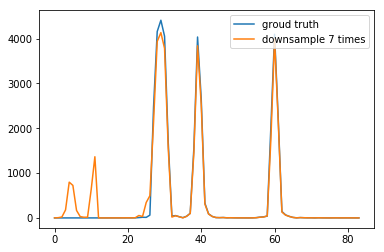

In [8]:
plt.plot(spec[0,:,10].cpu().numpy())
plt.plot(spec2010[0,:,10].cpu().numpy())
# plt.plot(spec_debug[0,:,10].cpu().numpy())
plt.legend(['groud truth', 'downsample 7 times'])

In [6]:
torch_down[-1].shape

torch.Size([1, 1, 1722])

In [7]:
y_list[-1].shape

(3446,)

In [23]:
torch_down[0].shape

torch.Size([1, 1, 110250])

In [51]:
torch_down

[tensor([[[ 0.3638,  1.5946,  2.1057,  ..., -2.1063, -1.5944, -0.3632]]]),
 tensor([[[ 0.9792,  1.9973,  1.4493,  ..., -1.4490, -1.9968, -0.9788]]]),
 tensor([[[ 1.4882,  1.9916,  2.6612,  ..., -1.3358, -3.0009, -1.7229]]]),
 tensor([[[ 1.7399,  1.9025, -0.2313,  ...,  0.6387, -1.1663, -2.3619]]]),
 tensor([[[ 1.8212, -0.5264, -0.9047,  ..., -1.7597,  1.3786, -0.2638]]]),
 tensor([[[ 0.6474,  0.2477, -0.3418,  ..., -0.4149, -0.4175,  0.5574]]]),
 tensor([[[ 0.4476, -0.1874,  0.0426,  ...,  0.1249,  0.1537, -0.4162]]])]

In [53]:
fft_resample_list[0].shape

torch.Size([1, 1, 220500])

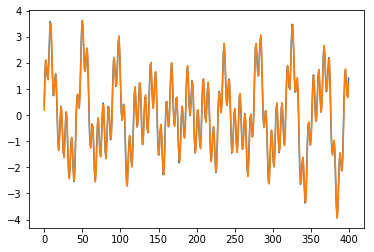

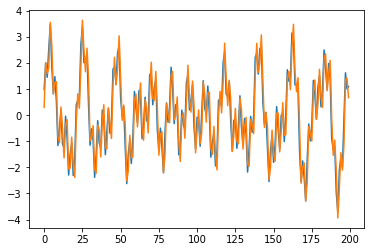

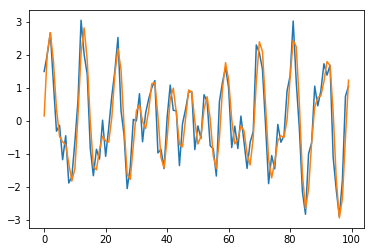

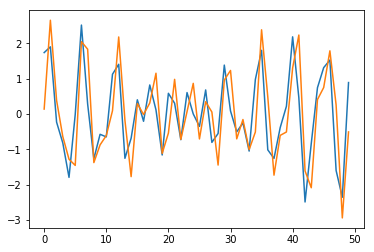

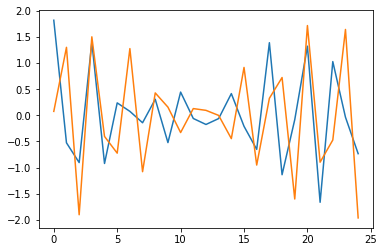

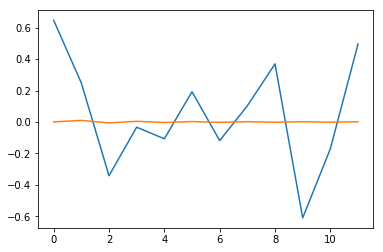

IndexError: list index out of range

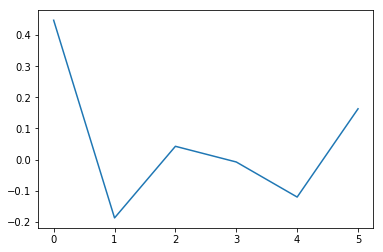

In [50]:
upbound = 400
for i in range(len(torch_down)):
    plt.plot(torch_down[i][0,0].cpu().numpy()[:upbound])  
    plt.plot(fft_resample_list[i+1][0,0].cpu().numpy()[:upbound])
    plt.show()
    upbound = upbound//2

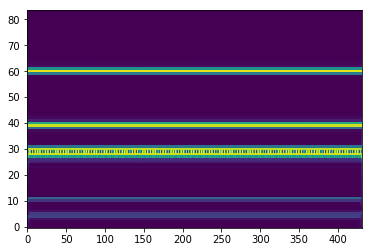

In [7]:
plt.imshow(spec2010[0,:].cpu().numpy(), aspect='auto', origin='lower')

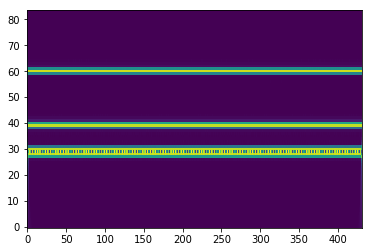

In [110]:
plt.imshow(spec[0,:].cpu().numpy(), aspect='auto', origin='lower')

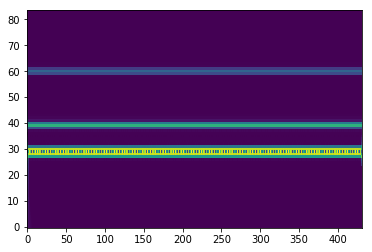

In [11]:
plt.imshow(spec_debug[0,:].cpu().numpy(), aspect='auto', origin='lower')